# COGS 108 - Title

## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [X] YES - make available
- [ ] NO - keep private

<a id='overview'></a>
# Overview

During this project, our group aims to find the correlation between counties’ wealth and its effect on air quality. This study tries to look at this relationship additionally with comparing it to before and after COVID-19 hit. Against our expectations, our results show that there is not a strong correlation between wealth and air quality improvement, and that even though there is a decrease in pollution throughout the years 2018-2020, there is not a lot of evidence that COVID-19 was the reason for it.

## Names

- Khulan Hoshartsaga
- Fione Huynh
- Lara Pellon
- Ezhil Thaenraj
- Rafael Ubriaco

<a id='research_question'></a>
# Research Question

<b>How has COVID-19 impacted high-income counties air quality in comparison to middle-income and low-income counties?</b>

<a id='Background & Prior Work'></a>
# Background & Prior Work

Climate change has been an ongoing issue throughout the world, and it is a topic that has conflicted and divided many groups within society. The subject of climate change has gained popularity over the years as extreme weather conditions have impacted our daily lives and infected the projected use of energy consumption. To us, the severity of this issue pressures us as young adults to scrutinize why there is still a slow improvement towards addressing global warming, and how this may be associated with how individuals tie-in towards the issue.

Our interest in this topic is narrowed down to air quality in the United States. More specifically, how a county’s wealth can work in favor or against air quality. In addition to this, our group wanted to explore the effects of COVID-19 on this issue. It is well known that the pandemic has forced many individuals to work from home, decreasing commuting rates and temporarily shutting off offices, which in turn decreased energy consumption. However, this was not the case for everyone. Jobs that require in person attendance were still being demanded, and in places where there is a lot of manual workforce, the belief is that there is not a lot of wealth found there.

As a result, this project will inspect how COVID-19 impacted affluent county’s air quality in comparison to less affluent ones. According to the U.S Energy Information Administration, we can already see that CO2 emissions had a decline of nearly 11% in 2020, which can be resulted from the stay-at-home orders and the decrease in transportation rate (1). However, this figure does not illustrate which counties aided this improvement. It is therefore, our aim to provide this information in order to better understand how 2020 had an impact in this issue.

Scholars Hai-Ahn H. Dang, Haishan Fu, and Umar Serajuddin have previously conducted research on how GDP growth relates to the environment degradation, but they took a more macro perspective and focused on this relationship across countries. The researchers found out that while '[...] GDP per capita increased by half between 1990 and 2016, global trends for air pollution [...] followed a similar upward trajectory.' (2). However, another study conducted by Guillaume Vandenbroucke and Heting Zhul had findings that indicated ' Pollution in the United States rises with economic activity, but at a noticeably lower pace.' (3)

We will conduct this project by correlating each county’s GDP with their locations’ climate analysis pre and post the start of the pandemic.

References (include links):
- 1) 'U.S. Energy Information Administration - EIA - Independent Statistics and Analysis. After 2020 Decline, EIA Expects Energy-Related CO2 Emissions to Increase in 2021 and 2022 - Today in Energy - U.S. Energy Information Administration (EIA), www.eia.gov/todayinenergy/detail.php?id=46537
- 2) https://blogs.worldbank.org/opendata/does-gdp-growth-necessitate-environmental-degradation
- 3) https://research.stlouisfed.org/publications/economic-synopses/2017/06/23/measures-of-pollution/


<a id='Hypothesis'></a>
# Hypothesis

We hypothesize that there will be a bigger improvement in air quality from wealthier counties in comparison to less wealthy ones. The main reason we perceive this is from the convenience wealthier citizens have in working from home, closing their offices, and therefore spending less commuting. In contrast, poorer counties are expected to have maintained a high manual labor workforce that still contributed towards a polluted climate.

<a id='datasets'></a>
# Dataset(s)

#### <b>Dataset Name: County GDP Capita 2009-2018</b>

Link to the dataset: https://ssti.org/blog/useful-stats-capita-county-level-gdp

Number of observations: 3116 (before data cleaning)

Columns in the dataset for each observation:
- Clean GeoFIPS: unique numeric codes the identify geographic areas that the Census Bureau uses
- GeoName: County names with abbreviated state names
- State: State names
- County: County names
- State Abb.: Abbreviation of state names
- LineCode: Some numeric value
- Industry Descriptions: Main forms of industry within that county
- GDP Per Capita 2018
- County Population *Year*: 11 columns from 2008-2018 that contain numeric values on current county population
- GDP per Capita *Year*: 11 columns from 2008-2018 that contain numeric values on counties GDP per capita
- *Year* GDP: 11 columns from 2008-2018 that contain numeric values on current county GDP
- Total Population Change: Total population change from 2008-2018
- Average Annual Percent Change: The annual average percent change in population 
- Total Percent Change: The total average percent change in population 
- Metro / Micro / Rural: County classification; A metro area has 50,000+ population, a micro area has a population from 10,000 to 49,999, all other counties that do not fall into these categories are rural
- Central / Outlying / Rural: Geographic classifications of counties based on population density
- Percent of Total Dollar Change: Percent of total dollar change from 2008-2018


Description: This dataset is from the State Science & Technology Institute site from a national nonprofit organization. It contains the gross domestic product (GDP) per capita for all of the counties and states in the United States from 2009 to 2018. It also includes information about each counties' rankings in their state and the percent change during those years.



#### <b>Dataset Name: Daily AQI By County 2018-2020</b>

Link to the dataset: https://aqs.epa.gov/aqsweb/documents/data_api.html

Number of observations: 903067 (before data cleaning)

Columns in the dataset for each observation:
- State Name
- County Name
- Date: date for day the AQI data corresponds to in the format of yyyy-mm-dd
- AQI: the air quality index (0-500)
- Category: the category that the air quality index falls into (good, satisfactory, moderate, poor, very poor, servere)
- Defining Parameter: the name of the pollutants 
- Number of Sites Reporting

Description: This dataset is from the United States Enviromental Protection Agency. This dataset has the daily AQI for all of the counties in the United States from 2018 to 2020. (We split the data into the seperate years, but all of the data on AQI is from this one dataset). It also contains information specific to how the data was gathered like the number of sites and the code for the defining site.

How we plan to combine our datasets: We are using the first dataset on GDP to determine which counties are considered affluent. Then we are using the the second dataset to see the changes in air quality before and after COVID-19.


<a id='setup'></a>
# Setup

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np

# allows program to read the EXCEL file
!pip install xlrd
!pip install openpyxl

     |████████████████████████████████| 96 kB 8.2 MB/s 
     |████████████████████████████████| 243 kB 24.3 MB/s 


In [ ]:
# read in the data

gdp_data = pd.read_excel('beareal-county-gdp-capita-2009-2018.xlsx', engine='openpyxl')
aqi_data = pd.read_csv('AQI.csv')

# Set font size for graph labels
sns.set(font_scale = 1.5)

<a id='data_cleaning'></a>
# Data Cleaning

### GDP Data Cleaning

Since there are an excess amount of columns that we would not like to use, we dropped every column except for <mark>State</mark>, <mark>County</mark>, and <mark>GDP per Capita 2018</mark>.

In [ ]:
gdp_data.drop(gdp_data.columns.difference(['State','County', 'GDP per Capita 2018']), 1, inplace=True)

gdp_data

,State,County,GDP per Capita 2018
0,Alabama,Autauga,26.873442
1,Alabama,Baldwin,27.746731
2,Alabama,Barbour,30.541657
3,Alabama,Bibb,16.167133
4,Alabama,Blount,14.730055
...,...,...,...
3111,Wyoming,Sweetwater,86.964277
3112,Wyoming,Teton,93.951169
3113,Wyoming,Uinta,43.989859
3114,Wyoming,Washakie,44.052651


A new column was created in <b>gdp_data</b> so that we can eventually merge the <b>gdp_data</b> and the <b>aqi_data</b> by state and county name.

In [ ]:
gdp_data['State + County'] = gdp_data['State'] +  " " + gdp_data['County']

### AQI Data Cleaning

We will now be examining the <b>AQI.csv</b> file. We originally downloaded this through an API provided by the United States Enviromental Protection Agency. The code we used to merge and create this file can be found in the Appendix below.

In [ ]:
aqi_data

,Unnamed: 0,State Name,county Name,Date,AQI,Category,Defining Parameter,Number of Sites Reporting
0,0,Alabama,Baldwin,2018-01-02,32,Good,PM2.5,1
1,1,Alabama,Baldwin,2018-01-05,34,Good,PM2.5,1
2,2,Alabama,Baldwin,2018-01-08,15,Good,PM2.5,1
3,3,Alabama,Baldwin,2018-01-11,19,Good,PM2.5,1
4,4,Alabama,Baldwin,2018-01-14,25,Good,PM2.5,1
...,...,...,...,...,...,...,...,...
903062,217709,Wyoming,Weston,2020-06-26,43,Good,Ozone,2
903063,217710,Wyoming,Weston,2020-06-27,61,Moderate,Ozone,2
903064,217711,Wyoming,Weston,2020-06-28,49,Good,Ozone,2
903065,217712,Wyoming,Weston,2020-06-29,54,Moderate,Ozone,2


The <mark>date</mark> in the dataframe is originally provided as a string object. In order to create an average "air quality index" (known as AQI) we first created a function to extract the month and year information. 

In [ ]:
def get_month(dateObjStr):
    date_time_obj = datetime.strptime(dateObjStr, '%Y-%m-%d')
    return date_time_obj.month

def get_year(dateObjStr):
    date_time_obj = datetime.strptime(dateObjStr, '%Y-%m-%d')
    return date_time_obj.year

The <mark>get_month</mark> and <mark>get_year</mark> function is applied to the data in <b>aqi_data</b>.

In [ ]:
aqi_data['Month'] = aqi_data['Date'].apply(get_month)
aqi_data['Year'] = aqi_data['Date'].apply(get_year)

A new column was created in <b>aqi_data</b> so that we can eventually merge the <b>gdp_data</b> and the <b>aqi_data</b> by state and county name.

In [ ]:
aqi_data['State + County'] = aqi_data['State Name'] +  " " + aqi_data['county Name']

Created a dictionary to help us populate the dataframe.

In [ ]:
aqi_dict = aqi_data.groupby(['State + County','Year'])['AQI'].mean()

Created a function to lookup the counties AQI for a specific year and then apply it to populate the dataframe.

In [ ]:
def get_county_aqi_year(state_county_str, year):
    if (state_county_str,year) in aqi_dict:
        return aqi_dict[state_county_str][year]
    else:
        return None

In [ ]:
gdp_data['AQI 2018'] = gdp_data['State + County'].apply(get_county_aqi_year,year=2018)
gdp_data['AQI 2019'] = gdp_data['State + County'].apply(get_county_aqi_year,year=2019)
gdp_data['AQI 2020'] = gdp_data['State + County'].apply(get_county_aqi_year,year=2020)

Removed counties that we have no AQI data for at all.

In [ ]:
gdp_data = gdp_data.dropna(thresh=5)

<a id='data_analysis_and_results'></a>
# Data Analysis & Results

### Exploratory Data Analysis (EDA)

We want to first take a look at our data.

In [ ]:
print(gdp_data.shape)
gdp_data.head()

(1012, 7)


,State,County,GDP per Capita 2018,State + County,AQI 2018,AQI 2019,AQI 2020
1,Alabama,Baldwin,27.746731,Alabama Baldwin,36.829630,38.291513,35.392857
13,Alabama,Clay,25.358499,Alabama Clay,28.990909,31.149533,27.379310
16,Alabama,Colbert,50.570474,Alabama Colbert,35.635379,35.520913,NaN
24,Alabama,DeKalb,24.837275,Alabama DeKalb,36.720000,39.711911,36.925620
25,Alabama,Elmore,20.861301,Alabama Elmore,35.328829,38.421053,31.637584


In [ ]:
gdp_data.describe()

,GDP per Capita 2018,AQI 2018,AQI 2019,AQI 2020
count,1012.000000,999.000000,993.000000,978.000000
mean,50.817973,38.240931,36.625146,35.359747
std,44.598790,11.457374,11.423941,11.932848
min,11.932602,0.090909,0.014045,0.000000
25%,33.591813,34.044760,33.404692,31.971404
50%,43.076101,38.695055,37.986301,37.397557
75%,56.385640,43.280023,42.368421,41.109308
max,862.665042,98.575342,121.876712,115.868132


We can see that some observations are missing certain AQI data between 2018 - 2020. These observations are removed since they do not contain a complete observation and might potentially weaken our analysis and results.

In [ ]:
gdp_data = gdp_data.dropna(axis = 0, how='any')

print(gdp_data.shape)
gdp_data.head()


(967, 7)


,State,County,GDP per Capita 2018,State + County,AQI 2018,AQI 2019,AQI 2020
1,Alabama,Baldwin,27.746731,Alabama Baldwin,36.829630,38.291513,35.392857
13,Alabama,Clay,25.358499,Alabama Clay,28.990909,31.149533,27.379310
24,Alabama,DeKalb,24.837275,Alabama DeKalb,36.720000,39.711911,36.925620
25,Alabama,Elmore,20.861301,Alabama Elmore,35.328829,38.421053,31.637584
27,Alabama,Etowah,27.234284,Alabama Etowah,42.910494,41.666667,34.994083


We ran a pairplot to see if there is any indication of a correlation between each feature in the given dataset.

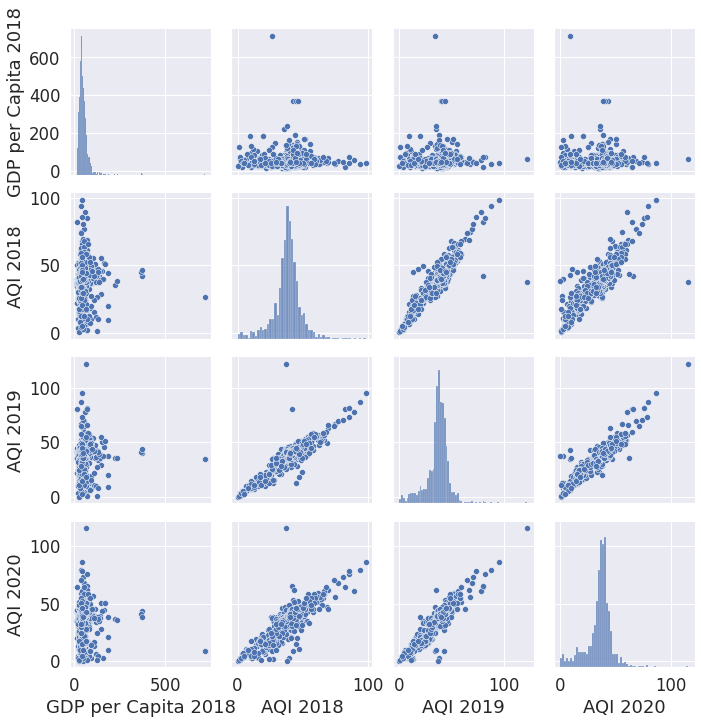

In [ ]:
sns.pairplot(data = gdp_data)

Based on our findings, there is no immediate correlation that we can identify from the pairplot. However, that does not necessarily mean that there are no correlations present within the data. Further analysis on the data would have to be done to identify correlations within specific categories.

In [ ]:
gdp_data.corr()

,GDP per Capita 2018,AQI 2018,AQI 2019,AQI 2020
GDP per Capita 2018,1.000000,0.043058,0.048077,0.001807
AQI 2018,0.043058,1.000000,0.896928,0.852532
AQI 2019,0.048077,0.896928,1.000000,0.920245
AQI 2020,0.001807,0.852532,0.920245,1.000000


The correlation matrix further shows that there is little correlation between <b>GDP per capita</b> and <b>AQI</b>. In order to better visualize the trend between these two variables, standardization of the data is required.

We decided to take a closer look at one of our data points of interest which was the relationship between <mark>GDP per Capita</mark> and <mark>AQI 2018</mark>.

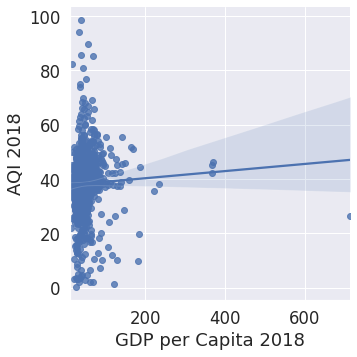

In [ ]:
sns.lmplot(data=gdp_data, x="GDP per Capita 2018", y="AQI 2018")

Based on our EDA, we needed to take the log of our <mark>GDP per Capita 2018</mark> because the ranges of our data are too far apart from one another.  

In [ ]:
gdp_data['Log GDP per Capita 2018'] = gdp_data['GDP per Capita 2018'].apply(lambda x: np.log(x))

We wanted to see if there are any correlations present within each year to see what the distribution looks like.

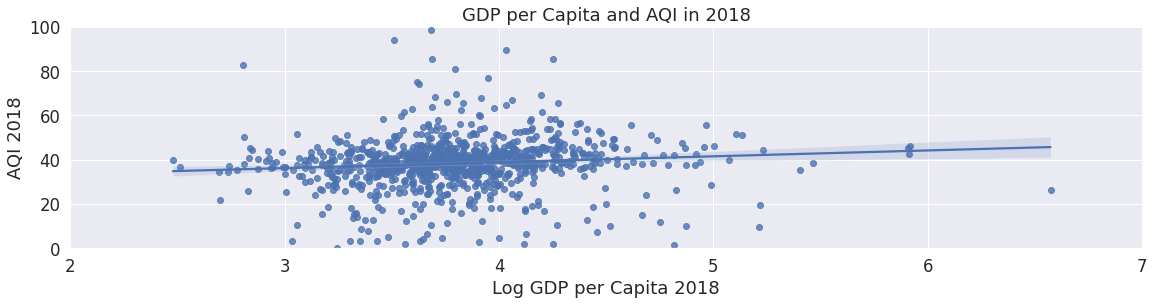

In [ ]:
a_plot = sns.lmplot(data=gdp_data, x="Log GDP per Capita 2018", y="AQI 2018", height = 4, aspect = 4)

a_plot.set(xlim=(2, 7))
a_plot.set(ylim=(0, 100))
a_plot.set(title="GDP per Capita and AQI in 2018")

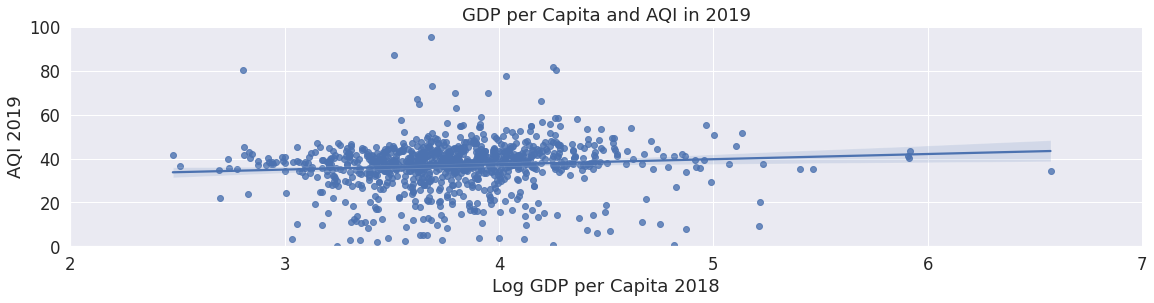

In [ ]:
b_plot = sns.lmplot(data=gdp_data, x="Log GDP per Capita 2018", y="AQI 2019", height = 4, aspect = 4)

b_plot.set(xlim=(2, 7))
b_plot.set(ylim=(0, 100))
b_plot.set(title="GDP per Capita and AQI in 2019")

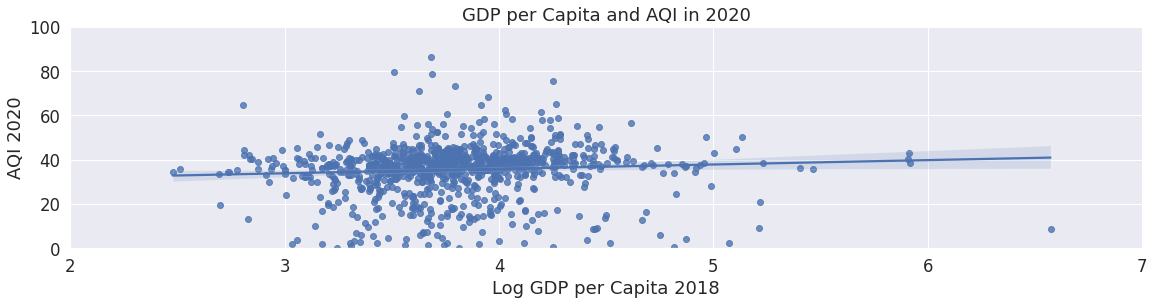

In [ ]:
c_plot = sns.lmplot(data=gdp_data, x="Log GDP per Capita 2018", y="AQI 2020", height = 4, aspect = 4)

c_plot.set(xlim=(2, 7))
c_plot.set(ylim=(0, 100))
c_plot.set(title="GDP per Capita and AQI in 2020")

Splitting data of GDP per capita by percentiles would allow us to get a sense of whether or not there is a correlation betwen the GDP per capita and AQI for either high, medium or low income groups 

- high == 99th percentile
- medium == between 33rd and 66th percentile
- low == below 33rd percentile

In [ ]:
highInc_AQI = gdp_data[gdp_data['GDP per Capita 2018'] <= gdp_data['GDP per Capita 2018'].quantile(.99)]
highInc_AQI = highInc_AQI[ highInc_AQI['GDP per Capita 2018'] >= highInc_AQI['GDP per Capita 2018'].quantile(.66)]

midInc_AQI = gdp_data[gdp_data['GDP per Capita 2018'] <= gdp_data['GDP per Capita 2018'].quantile(.66)]
midInc_AQI = midInc_AQI[midInc_AQI['GDP per Capita 2018'] >= midInc_AQI['GDP per Capita 2018'].quantile(.33)]

lowInc_AQI = gdp_data[gdp_data['GDP per Capita 2018'] <= gdp_data['GDP per Capita 2018'].quantile(.33)]  


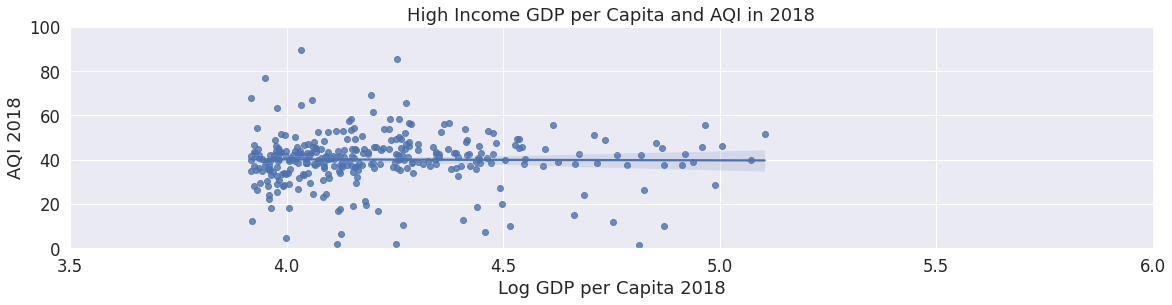

In [ ]:
a_plot = sns.lmplot(data=highInc_AQI, x="Log GDP per Capita 2018", y="AQI 2018", height = 4, aspect = 4)

a_plot.set(xlim=(3.5, 6))
a_plot.set(ylim=(0, 100))
a_plot.set(title="High Income GDP per Capita and AQI in 2018")

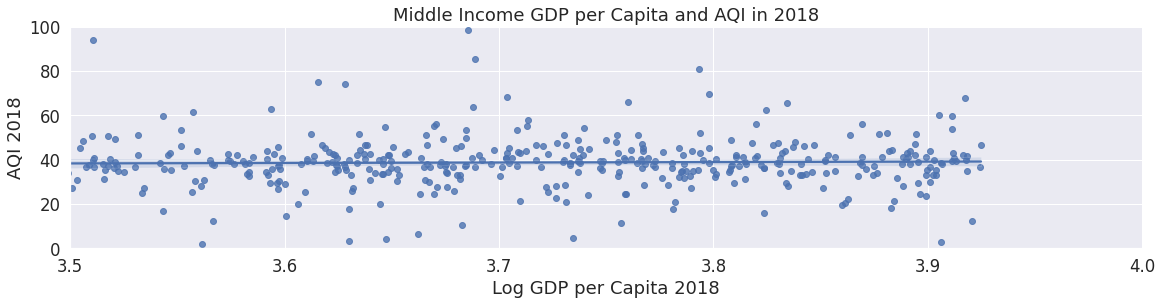

In [ ]:
b_plot = sns.lmplot(data=midInc_AQI, x="Log GDP per Capita 2018", y="AQI 2018", height = 4, aspect = 4)

b_plot.set(xlim=(3.5, 4))
b_plot.set(ylim=(0, 100)) 
b_plot.set(title="Middle Income GDP per Capita and AQI in 2018")

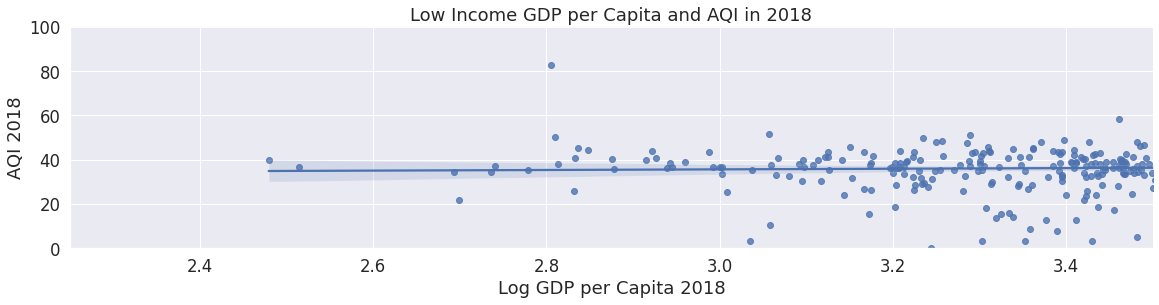

In [ ]:
c_plot = sns.lmplot(data=lowInc_AQI, x="Log GDP per Capita 2018", y="AQI 2018", height = 4, aspect = 4)

c_plot.set(xlim=(2.25, 3.5))
c_plot.set(ylim=(0, 100))
c_plot.set(title="Low Income GDP per Capita and AQI in 2018")

From this we can see there is no real correlation between AQI and GDP per capita when in reference to income.

### Data Comparison 2019 and 2020

We know that there might be no true correlation between AQI and GDP per capita but remember that we also want to see if COVID-19 might have impacted pollution in counties. We will see if there is an effect between low and high income counties from 2019(pre-COVID-19) and 2020(during COVID-19).

The code below breaks the AQI data into averages by the year and month.

In [ ]:
aqi_dict = aqi_data.groupby(['Year','Month'])['AQI'].mean()
aqi_dict.head()


Year  Month
2018  1        35.183183
      2        33.458956
      3        38.356556
      4        42.623292
      5        45.536837
Name: AQI, dtype: float64

We are graphing the AQI from 2019 and 2020 across all counties. We are doing a month by month comparison from January to October to see if there is a change in pollution before and during COVID. We do not provide the comparison for November and December since we do not have the November and December AQI available from 2020.

[30.96107211231653, 32.11591723040191, 34.6021894041103, 37.46581954993966, 36.55624379726909, 40.64664348566563, 40.438770966305476, 40.023719109657065, 36.072771124417834, 35.35926305015353]
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'AQI in All Counties: 2019 vs 2020'}, xlabel='Month'>

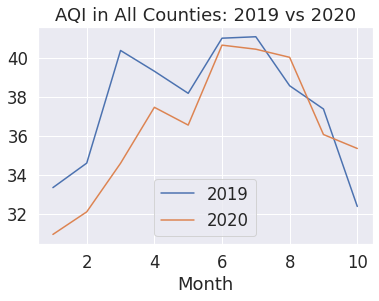

In [ ]:
keys_2019 = aqi_dict[2019].keys()[0:10]
val_2019 = [float(aqi_dict[2019][k]) for k in keys_2019][0:10]


keys_2020 = aqi_dict[2020].keys()[0:10]
val_2020 = [float(aqi_dict[2020][k]) for k in keys_2020][0:10]
print(val_2020)


sns.lineplot(keys_2019,val_2019, err_style=None, label="2019").set_title("AQI in All Counties: 2019 vs 2020")
sns.lineplot(keys_2020,val_2020, err_style=None, label="2020")

From looking at the graph above, you can see that in the earlier months of COVID (March - May) and before COVID (January - February) there was a drop in AQI for all counties.  

We joined the GDP data with the AQI data because we need it to determine whether or not a county is in the high percentile or in the low percentile of GDP per capita.

In [ ]:
aqi_data = aqi_data.join(gdp_data.set_index('State + County'), on='State + County')

We are graphing the AQI from 2019 and 2020 across high income counties. We are doing a month by month comparison from January to October to see if there is a change in pollution before and during COVID in the high income counties.

[28.067729083665338, 29.11814345991561, 31.87962962962963, 31.354430379746834, 31.34817813765182, 35.733333333333334, 37.64081632653061, 38.5, 28.933333333333334, 3.0]
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'AQI in High Income Counties: 2019 vs 2020'}, xlabel='Month'>

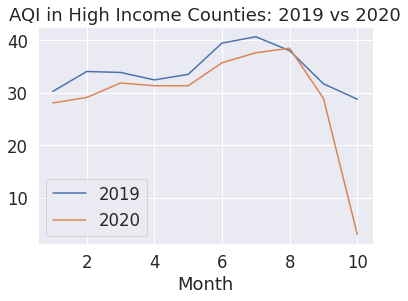

In [ ]:
aqi_dict = aqi_data[aqi_data['GDP per Capita 2018'] > aqi_data['GDP per Capita 2018'].quantile(0.99)].groupby(['Year','Month'])['AQI'].mean()

keys_2019 = aqi_dict[2019].keys()[0:10]
val_2019 = [float(aqi_dict[2019][k]) for k in keys_2019][0:10]


keys_2020 = aqi_dict[2020].keys()[0:10]
val_2020 = [float(aqi_dict[2020][k]) for k in keys_2020][0:10]
print(val_2020)


sns.lineplot(keys_2019,val_2019, err_style=None, label="2019").set_title("AQI in High Income Counties: 2019 vs 2020")
sns.lineplot(keys_2020,val_2020, err_style=None, label="2020")

We are graphing the AQI from 2019 and 2020 across low income counties. We are doing a month by month comparison from January to October to see if there is a change in pollution before and during COVID in the low income counties.

[28.777245810759734, 30.27142485022141, 33.85323145495065, 37.36314485244424, 35.80004368242874, 39.16683598600294, 37.43557707324692, 36.2870029455081, 33.839760291818656, 37.24849699398798]
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'AQI in Low Income Counties: 2019 vs 2020'}, xlabel='Month'>

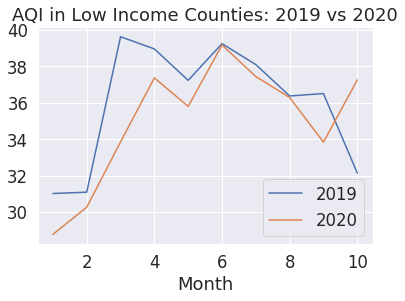

In [ ]:
aqi_dict = aqi_data[aqi_data['GDP per Capita 2018'] < aqi_data['GDP per Capita 2018'].quantile(0.33)].groupby(['Year','Month'])['AQI'].mean()

keys_2019 = aqi_dict[2019].keys()[0:10]
val_2019 = [float(aqi_dict[2019][k]) for k in keys_2019][0:10]


keys_2020 = aqi_dict[2020].keys()[0:10]
val_2020 = [float(aqi_dict[2020][k]) for k in keys_2020][0:10]
print(val_2020)


sns.lineplot(keys_2019,val_2019, err_style=None, label="2019").set_title("AQI in Low Income Counties: 2019 vs 2020")
sns.lineplot(keys_2020,val_2020, err_style=None, label="2020")

<a id='ethics_and_privacy'></a>
# Ethics & Privacy

The datasets we used are widely available so we are free to utilize the data for our project. The datasets are both from nonprofit organizations. Thus, there should not be any biases in the data nor should the data have been collected in an unethical manner. Additionally, the data we have decided to work with is not based on opinions which also means that the data should not have biases. The data also does not include any personal information that is specific to a single individual so there should be no leak in privacy. The EPA, where we got the data for air quality, also states that they implement the Privacy Act of 1974. The Privacy Act of 1974 controls how data on individuals are maintained.  

One difficulty that we ran into was deciding how to split the counties into low and high income counties. To avoid biases that we may have on what is considered high or low income, we decided to split the counties according to what percentile they are in. We also included reasoning for the choices we have made so the algorithm we used for analysis is as transparent as we can make it. 

<a id='conclusion_and_discussion'></a>
# Conclusion & Discussion

As we learned from our pairplot and correlation matrix, there is <b>little to no correlation</b> between <b>GDP per capita and AQI</b>. Even so, we decided to further delve into our GDP per capita data and divide it into high, medium, and low income groups, according to specific percentiles. After conducting our analysis, <b> our data still showed us little to no real correlation between these two variables</b>.  From the line plots comparing how air quality changed before and after the pandemic started, we found that while both low- and high-income counties experienced a decrease in pollution in 2020, COVID-19 had different effects on both. In wealthier counties, the AQI values in 2020 were significantly lower than the ones from 2019, differently than what we see on the graph for poorer counties, thus proving that our initial hypothesis was indeed correct.

While we proved our initial hypothesis, for our project we only considered one factor in determining a county's wealth status (GDP per capita). If we included other socio-economic factors, such as education and health levels, we might have obtained different results. Additionally, changes in AQI might be more of a reflection of state/county policies and general local government orientation towards the handling of the virus than their wealth status. That is, the political affiliation of each county's leaders may have played a big part in the general level of the county's air quality. For example, counties that were associated with the Democratic Party took more restrictive measures than the ones closer to the Republican Party. This could impact our project due to the fact that we would not be making an "apples-to-apples" comparison between counties, and confounding variables would influence our results. 

In the end, <b>climate change has and will continue to be an important subject for society</b>. In order to protect the welfare of the people, governments need to constantly adjust their climate change plans. Our project therefore, permitted us to see if there should be a change in pollution policies for counties of different wealth levels. The data also allows us to see if implementing a policy that incentives people to stay more at home is useful in order to combat the ongoing issue of climate change, as we saw a successful decrease in the pollution throughout the year.    

<a id='team_contributions'></a>
# Team Contributions

<b>Khulan Hoshartsaga</b> contributed to the idea of our hypothesis and helped with research question. She data cleaned and conducted the entire data analysis and results with Ezhil Taenraj. She also provided detailed descriptions within the data analysis. She conducted maintenance on the Github repository and uploaded every checkpoint.
<br/><br/>
<b>Fione Huynh</b> contributed to the Dataset and the Data Cleaning section, and aided with the beginning stages of coming up with the topic. She also wrote the Ethics and Privacy. Finally, she assisted with the final video and slideshow.
<br/><br/>
<b>Lara Pellon</b> contributed on the Background and Prior Works, and aided to formulate the hypothesis and research question. She wrote the Conclusion and Discussion with Rafael Ubriaco, and established the Overview of the project. Finally, she put together the final video and designed the slideshow.
<br/><br/>
<b>Ezhil Thaenraj</b> contributed to Data Collection for AQI data for the years 2018-2020. Perfomed data cleaning and data concatenation to produce singular dataset for wrangling and analysis work. Worked with Khulan Hoshartsaga extensively on EDA and data analysis using complied data to provide insights regarding correlations between features and trend analysis of AQI in counties of various wealth groups.
<br/><br/>
<b>Rafael Ubriaco</b> contributed to the development of the research question, hypothesis, and the Background and Prior Works segment of the project. Besides assisting Lara Pellon with the Overview, on the Conclusion and Discussion segment, he wrote the project's conclusion and potential shortcoming of the project.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38ab8c06-a79e-4579-8cac-68cea2b736bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>